In [1]:
import pandas as pd
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [3]:
from plottings import *
from utils import *

In [4]:
df = pd.read_csv('../data/data.csv')

### data inspection

In [5]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Descriptive Statistics

In [7]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


### Missing Values Analysis

In [8]:
missing_values_table(df)

,Missing Values,% of Total Values


### Duplicate Transactions

In [9]:
# Check for duplicates based on 'TransactionId'
duplicate_transactions = df[df.duplicated(subset='TransactionId', keep=False)]

# Display duplicate rows
print(duplicate_transactions)

Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []


### Column Summary

In [10]:
column_summary(df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,TransactionId,object,0,95662,95662,"{'TransactionId_35670': 1, 'TransactionId_7687..."
1,BatchId,object,0,95662,94809,"{'BatchId_67019': 28, 'BatchId_51870': 16, 'Ba..."
2,AccountId,object,0,95662,3633,"{'AccountId_4841': 30893, 'AccountId_4249': 44..."
3,SubscriptionId,object,0,95662,3627,"{'SubscriptionId_3829': 32630, 'SubscriptionId..."
4,CustomerId,object,0,95662,3742,"{'CustomerId_7343': 4091, 'CustomerId_3634': 2..."
5,CurrencyCode,object,0,95662,1,{'UGX': 95662}
6,CountryCode,int64,0,95662,1,{256: 95662}
7,ProviderId,object,0,95662,6,"{'ProviderId_4': 38189, 'ProviderId_6': 34186,..."
8,ProductId,object,0,95662,23,"{'ProductId_6': 32635, 'ProductId_3': 24344, '..."
9,ProductCategory,object,0,95662,9,"{'financial_services': 45405, 'airtime': 45027..."


### Time Series Analysis

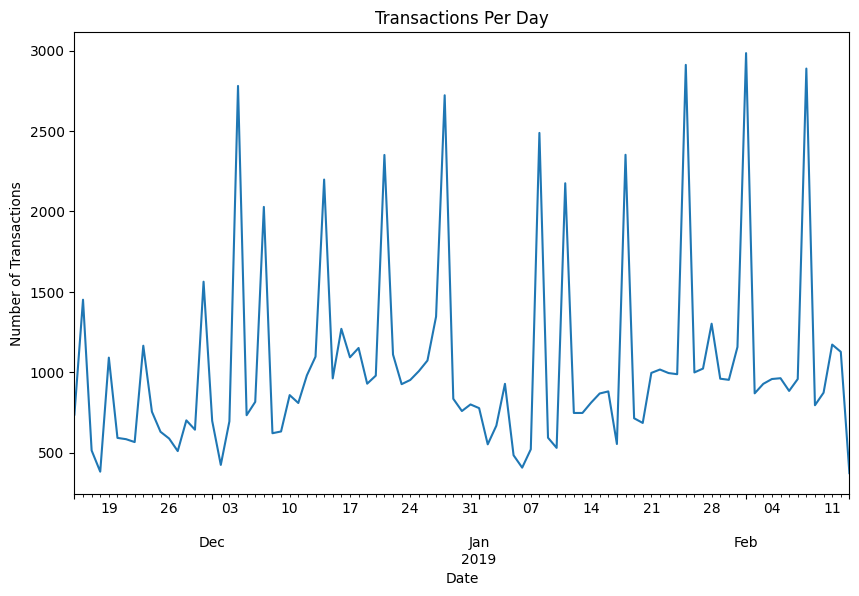

In [11]:
plot_transactions_per_day(df, 'TransactionStartTime', 'TransactionId')

### Top Ten Customers

In [12]:
# Top ten customers based on the amount they pay
top_customers_by_amount = df.groupby('CustomerId')['Amount'].sum().nlargest(10)
print("Top 10 customers based on the amount they pay:")
print(top_customers_by_amount)

# Top ten customers based on the number of transactions
top_customers_by_transactions = df['CustomerId'].value_counts().nlargest(10)
print("\nTop 10 customers based on the number of transactions:")
print(top_customers_by_transactions)

Top 10 customers based on the amount they pay:
CustomerId
CustomerId_909     83451240.0
CustomerId_1535    60212748.0
CustomerId_4878    50804960.0
CustomerId_5155    29726020.0
CustomerId_4453    29294460.0
CustomerId_2266    23768355.5
CustomerId_2445    17743762.0
CustomerId_2303    13074000.0
CustomerId_1175     8942702.5
CustomerId_1302     7740285.0
Name: Amount, dtype: float64

Top 10 customers based on the number of transactions:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64


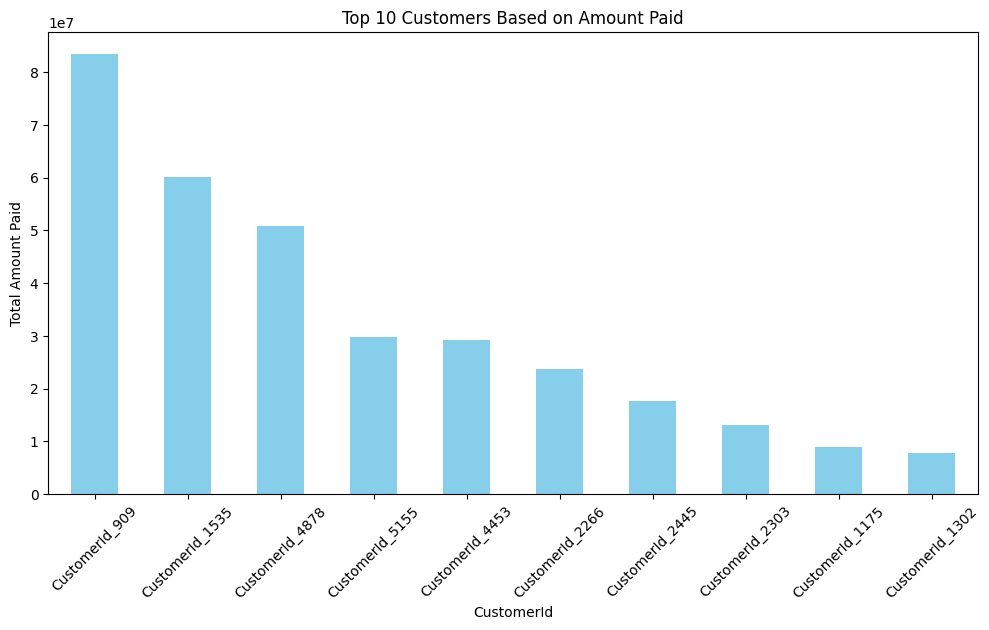

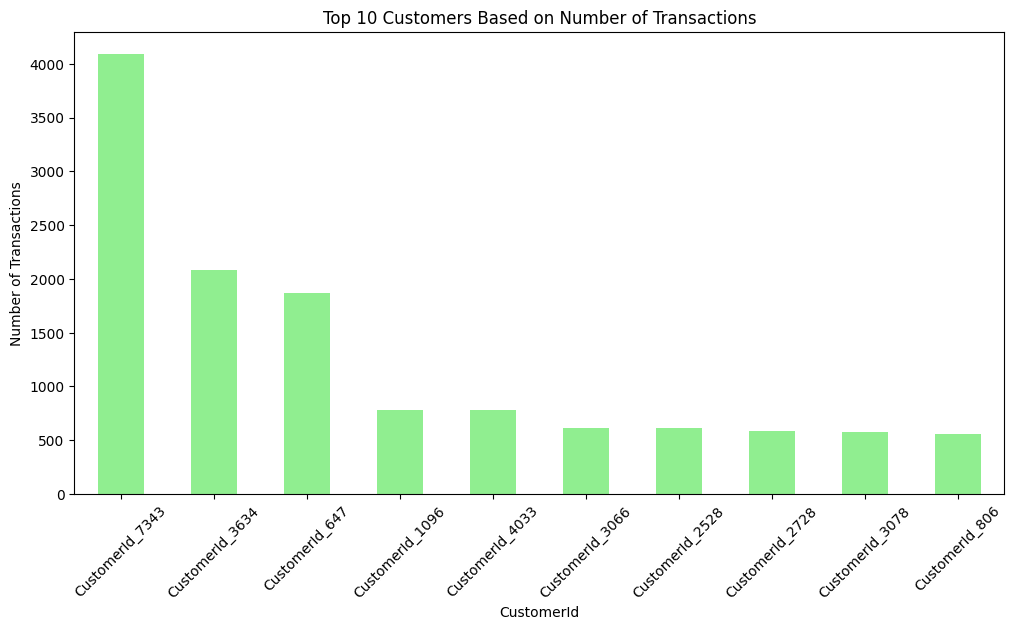

In [13]:
plot_top_customers(top_customers_by_amount, top_customers_by_transactions)

### Univariate Analysis

/home/olani/Documents/kifiya/week6/credit-scoring-model/scripts/plottings.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, order=data.value_counts().index, palette='viridis')


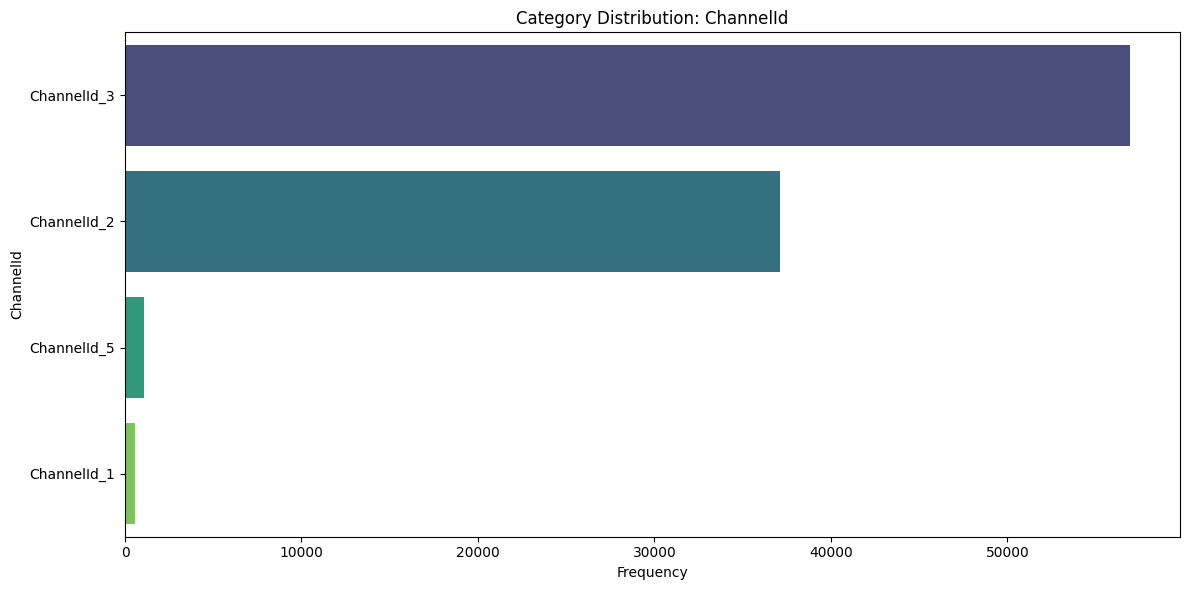

In [14]:
univariate_analysis(df['ChannelId'], 'ChannelId')

/home/olani/Documents/kifiya/week6/credit-scoring-model/scripts/plottings.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data, order=data.value_counts().index, palette='viridis')


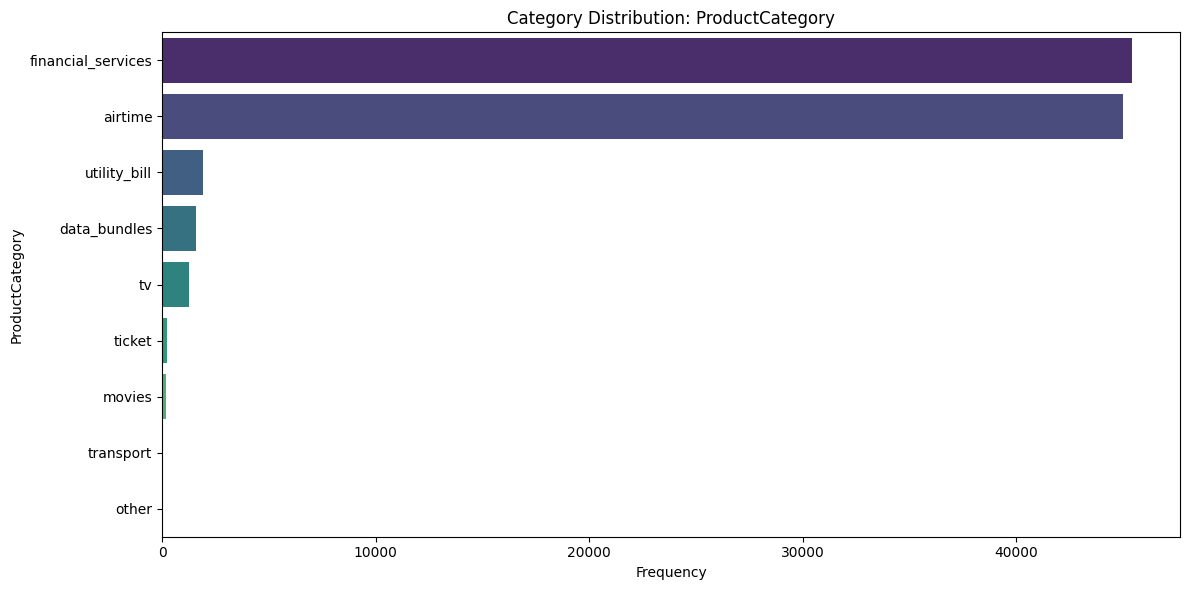

In [15]:
univariate_analysis(df['ProductCategory'], 'ProductCategory')

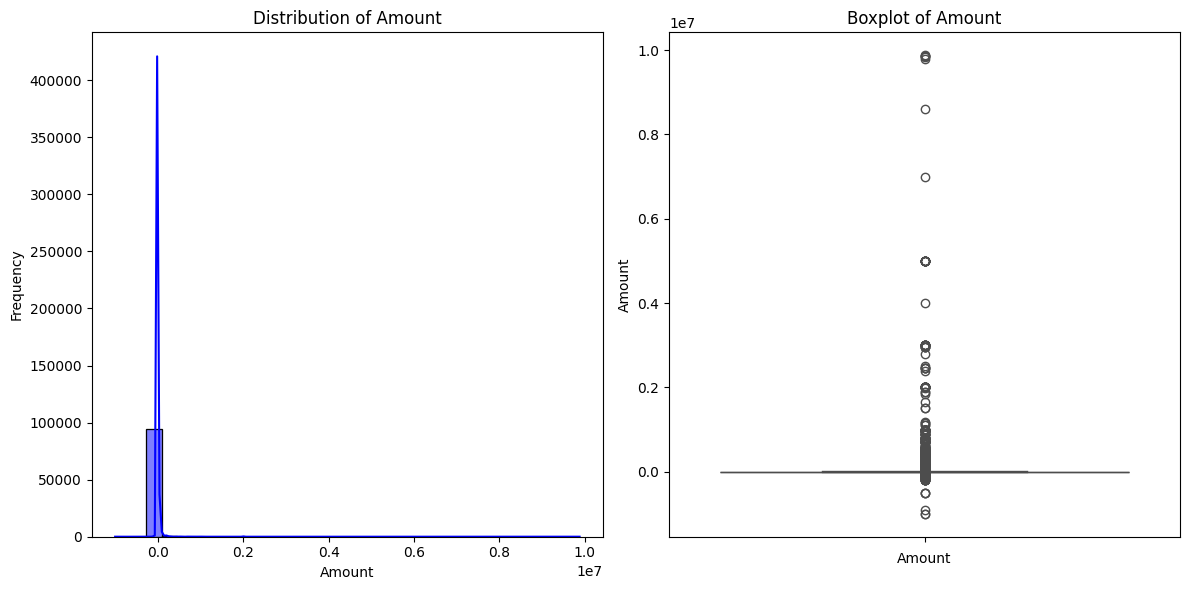

In [16]:
univariate_analysis(df['Amount'], 'Amount')

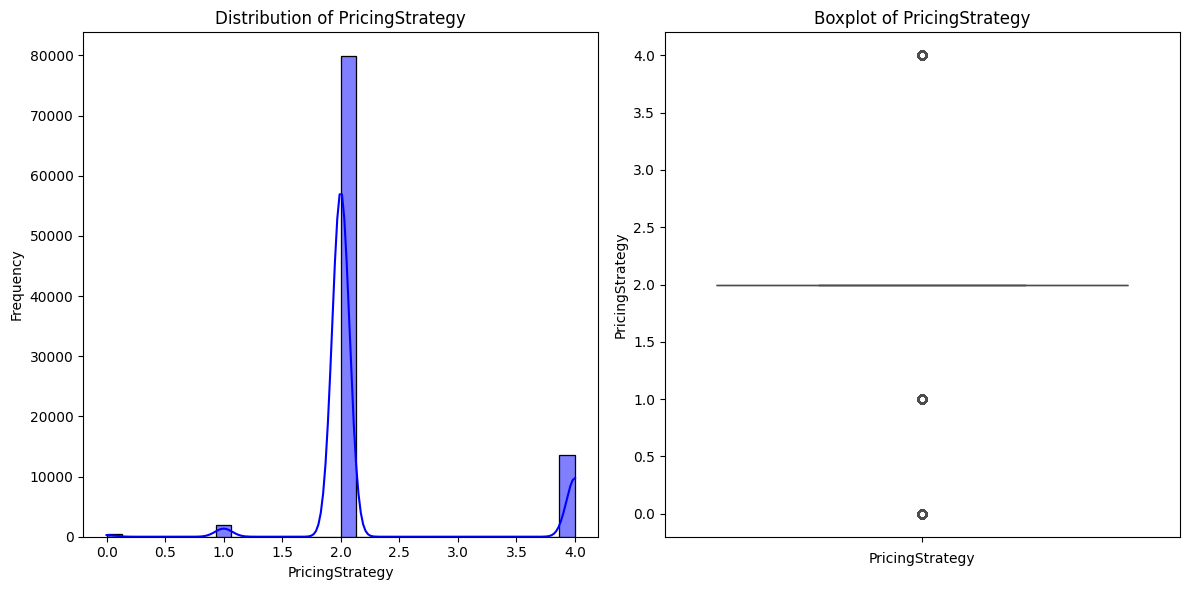

In [17]:
univariate_analysis(df['PricingStrategy'], 'PricingStrategy')

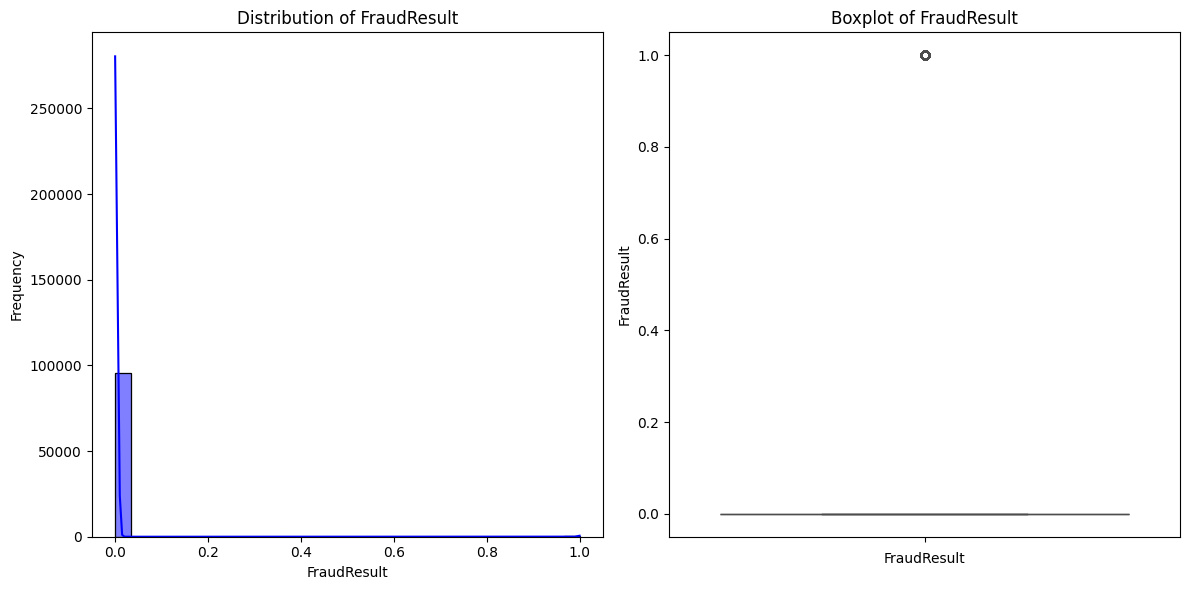

In [18]:
univariate_analysis(df['FraudResult'], 'FraudResult')

### Correlation Analysis

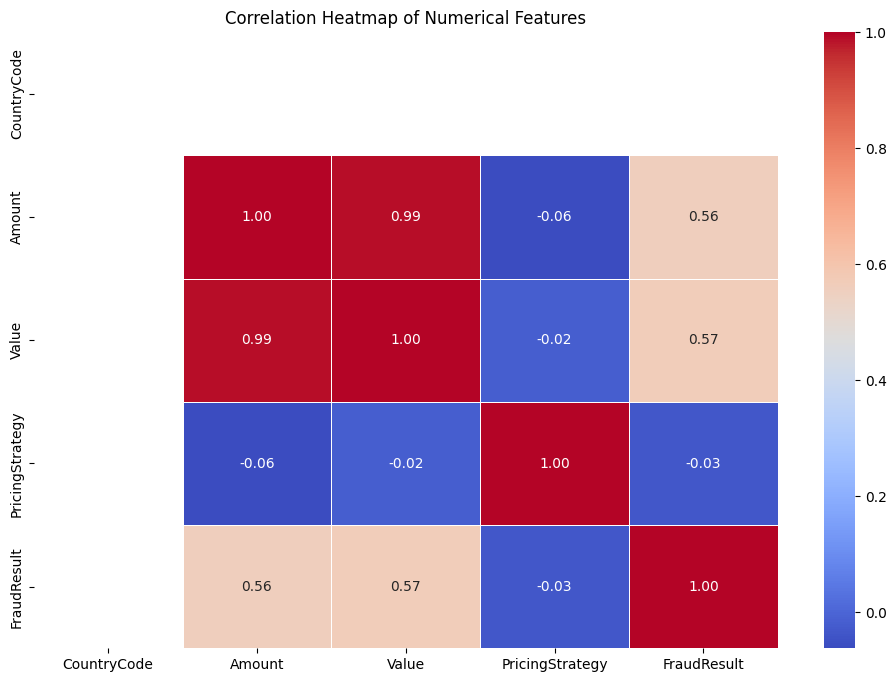

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


In [19]:
correlation_analysis(df)